### Label Encoding

In [89]:
# ライブラリ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




In [3]:
df = pd.read_csv('../data/penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


speciesとislandは順序尺度ではないので, label encodingはしないが、決定木を使う場合はlabelencodingでも良い.

In [8]:
from sklearn.preprocessing import OrdinalEncoder
df = pd.read_csv('../data/penguins_size.csv')
oe = OrdinalEncoder()
# データフレームにする
oe.set_output(transform='pandas')
df = oe.fit_transform(df)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,42.0,56.0,6.0,31.0,2.0
1,0.0,2.0,45.0,43.0,11.0,33.0,1.0
2,0.0,2.0,51.0,49.0,20.0,12.0,1.0
3,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,0.0,2.0,22.0,62.0,18.0,19.0,1.0
...,...,...,...,...,...,...,...
339,2.0,0.0,NaN,NaN,NaN,NaN,NaN
340,2.0,0.0,105.0,12.0,39.0,66.0,1.0
341,2.0,0.0,136.0,26.0,46.0,87.0,2.0
342,2.0,0.0,89.0,17.0,36.0,76.0,1.0


### Target Encoding

In [18]:
from category_encoders import TargetEncoder

# タイタニックデータ
df = sns.load_dataset('titanic')
# シンプルに欠損値を削除
df = df.dropna()


In [19]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [21]:
# bool型をobject型に変更(false , true)→(0,1)
df['adult_male'] = df['adult_male'].astype('object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    object  
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(1), category(2), float64(2), int64(4), object(6)
memory usage: 19.5+ KB


In [24]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [25]:
# インスタンス作成
encoder = TargetEncoder()
encoder.fit(df, df['survived'])
encoder.transform(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,0.931533,38.0,1,0,71.2833,0.737773,0.675159,0.950662,0.936698,0.592011,0.737773,0.999989,False
3,1,1,0.931533,35.0,1,0,53.1000,0.643481,0.675159,0.950662,0.936698,0.592011,0.643481,0.999989,False
6,0,1,0.436317,54.0,0,0,51.8625,0.643481,0.675159,0.391155,0.391155,0.717867,0.643481,0.013409,True
10,1,3,0.931533,4.0,1,1,16.7000,0.643481,0.628538,0.732342,0.936698,0.646289,0.643481,0.999989,False
11,1,1,0.931533,58.0,0,0,26.5500,0.643481,0.675159,0.950662,0.936698,0.592011,0.643481,0.999989,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,0.931533,47.0,1,1,52.5542,0.643481,0.675159,0.950662,0.936698,0.725425,0.643481,0.999989,False
872,0,1,0.436317,33.0,0,0,5.0000,0.643481,0.675159,0.391155,0.391155,0.737957,0.643481,0.013409,True
879,1,1,0.931533,56.0,0,1,83.1583,0.737773,0.675159,0.950662,0.936698,0.592011,0.737773,0.999989,False
887,1,1,0.931533,19.0,0,0,30.0000,0.643481,0.675159,0.950662,0.936698,0.737957,0.643481,0.999989,True


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    object  
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(1), category(2), float64(2), int64(4), object(6)
memory usage: 19.5+ KB


マルチクラスの場合

In [32]:
df = pd.read_csv('../data/penguins_size.csv')
# df['sex']には.が含まれているのでそれをNanに変換
df.loc[df[df['sex'] == '.'].index[0], 'sex'] = np.nan

In [37]:
targets = df['species'].unique()

In [33]:
encoder = TargetEncoder()
# まずはone-hotエンコーディング


In [39]:
encoder = TargetEncoder()
for target in targets:
    target_y = df['species'] == target
    encoder = TargetEncoder()
    df['encoded_island'+target] = encoder.fit_transform(df['island'], target_y)


In [40]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,encoded_islandAdelie,encoded_islandChinstrap,encoded_islandGentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0.978140,7.742061e-03,0.014118
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0.978140,7.742061e-03,0.014118
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0.978140,7.742061e-03,0.014118
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0.978140,7.742061e-03,0.014118
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0.978140,7.742061e-03,0.014118
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,0.261905,7.385705e-08,0.738095
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0.261905,7.385705e-08,0.738095
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0.261905,7.385705e-08,0.738095
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0.261905,7.385705e-08,0.738095


### Charenge

### ターゲットエンコーディングとワンホットエンコーディングの比較

- データセット: タイタニック
- クロスバリデーション: 5分割、3回繰り返し
- 欠損値の代入
  - カテゴリカル: 最頻値
  - 数値: 中央値
- 標準化
- ターゲットエンコーディングとワンホットエンコーディングの精度比較
- モデル: 任意（コースではロジスティック回帰を使用）
- 評価指標: 任意（コースではAccuracyを使用）


In [67]:
# ライブラリ
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import KFold, cross_val_score, RepeatedKFold
from sklearn.linear_model import LogisticRegression

In [58]:
# データ読み込み
df = sns.load_dataset('titanic')
# bool型をobject型に変更(false , true)→(0,1)
df['adult_male'] = df['adult_male'].astype('object')
df['alone'] = df['alone'].astype('object')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    object  
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    object  
dtypes: category(2), float64(2), int64(4), object(7)
memory usage: 92.8+ KB


In [68]:
# 結果を格納するディクショナリー
results = {}


In [126]:
target = 'survived'
X = df.drop([target,'alive'], axis=1)
y  = df[target]

n_splits = 5
n_repeats = 3
cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)
# ダミー変数生成クラスを自作(pipelineに入れるため)
from sklearn.base import BaseEstimator, TransformerMixin
class GetDummies(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.columns = None

    def fit(self, X, y=None):
        self.columns = pd.get_dummies(X).columns
        return self

    def transform(self, X):
        X_new = pd.get_dummies(X)
        return X_new.reindex(columns=self.columns, fill_value=0)


# 数値カラムとカテゴリカルカラムを分ける
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include='object').columns

# ColumnTransformerのインスタンス作成
ct = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', SimpleImputer(strategy='most_frequent'), cat_cols)
])

ct.set_output(transform='pandas')

pipeline = Pipeline(steps=[
    ('ct', ct),
    ('dummies', GetDummies()),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
results['one-hot encoding'] = np.mean(scores)
results



{'one-hot encoding': 0.8178247860565355, 'target encoding': 0.8185759420835689}

In [127]:
cat_cols = X.select_dtypes(include='object').columns

# ColumnTransformerのインスタンス作成
ct = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', TargetEncoder())
    ]), cat_cols)
])

pipeline = Pipeline(steps=[
    ('ct', ct),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
results['target encoding'] = np.mean(scores)
results

{'one-hot encoding': 0.8178247860565355, 'target encoding': 0.8185759420835689}

### 答え

データの説明

In [150]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [76]:
df.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [113]:
# adult_maleとaloneはカテゴリ変数を扱うための処理
# pclassは本来はカテゴリカル変数だが、数値変数として扱う
df[['adult_male', 'alone']] = df[['adult_male', 'alone']].astype('object')

In [114]:
X = df.drop('survived', axis=1)
y = df['survived']


In [152]:
# 欠損値代入 -> カテゴリ変数のエンコーディング -> 標準化 -> モデル

# 欠損値代入 -> SimpleImputerを使う
# cross_validationに組み込むためにはcolumntransformerを使う

scores = {}

cat_cols = X.select_dtypes(exclude=np.number).columns
num_cols = X.select_dtypes(include=np.number).columns

cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

# 一部のカラムに対してのみ処理を行う場合は、remainder='passthrough'を指定する。デフォルトだとdropになっている
# 今回は関係ない
ct = ColumnTransformer([('cat_imputer', cat_imputer, cat_cols),
                        ('num_imputer', num_imputer, num_cols)])

ct.set_output(transform='pandas')

# target encoding
# target encoderはfit_transformを持っている -> pipelineに入れることができる
pipeline_te = Pipeline(steps=[
    ('ct', ct),
    ('encoder', TargetEncoder()),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# one-hot encodingq
# get_dummiesはtransformのみ持っている -> pipelineに入れることができない -> 自作する必要がある
from sklearn.base import BaseEstimator, TransformerMixin
class GetDummies(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.columns = None

    def fit(self, X, y=None):
        self.columns = pd.get_dummies(X).columns
        return self

    def transform(self, X):
        X_new = pd.get_dummies(X)
        return X_new.reindex(columns=self.columns, fill_value=0)

pipeline_ohe = Pipeline(steps=[
    ('ct', ct),
    ('encoder', GetDummies()),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
scores['target encoding'] = cross_val_score(pipeline_te, X, y, cv=cv, scoring='accuracy')
scores['one-hot encoding'] = cross_val_score(pipeline_ohe, X, y, cv=cv, scoring='accuracy')



In [153]:
scores

{'target encoding': array([0.83240223, 0.78089888, 0.82022472, 0.84831461, 0.83146067,
        0.79888268, 0.79775281, 0.89325843, 0.79213483, 0.83707865,
        0.82122905, 0.86516854, 0.79213483, 0.81460674, 0.81460674]),
 'one-hot encoding': array([0.83240223, 0.7752809 , 0.81460674, 0.84831461, 0.83146067,
        0.7877095 , 0.81460674, 0.87078652, 0.80337079, 0.81460674,
        0.80446927, 0.86516854, 0.78651685, 0.80898876, 0.8258427 ])}

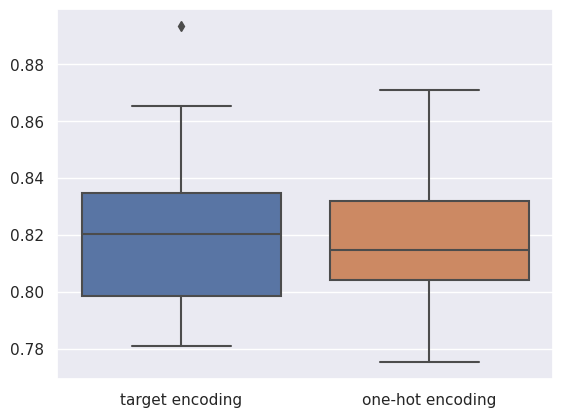

In [156]:
sns.boxplot(data=[scores['target encoding'], scores['one-hot encoding']])
plt.xticks([0,1], ['target encoding', 'one-hot encoding'])
plt.show()

In [164]:
print(f'target encoding : {scores["target encoding"].mean()}')
print(f'one hot encoding : {scores["one-hot encoding"].mean()}')
# scores['target encoding'].mean()

target encoding : 0.8226769610612432
one hot encoding : 0.8189421044922898


In [141]:
class Sayname():
    def __init__(self, name):
        self.name = name

    def say(self):
        print(self.name)

In [147]:
Sayname('taro').say()

taro


,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True
0,3,22.0,1,0,7.2500,False,True,False,False,True,...,False,False,False,False,False,False,False,True,True,False
1,1,38.0,1,0,71.2833,True,False,True,False,False,...,True,False,False,False,False,True,False,False,True,False
2,3,26.0,0,0,7.9250,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True,...,True,False,False,False,False,False,False,True,True,False
4,3,35.0,0,0,8.0500,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,True
887,1,19.0,0,0,30.0000,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
888,3,NaN,1,2,23.4500,True,False,False,False,True,...,False,False,False,False,False,False,False,True,True,False
889,1,26.0,0,0,30.0000,False,True,True,False,False,...,True,False,False,False,False,True,False,False,False,True
